In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 508.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.0 MB 508.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.0 MB 508.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.0 MB 508.0 kB/s eta 0:00:21
   - -------------------------------------- 0.5/11.0 MB 508.0 kB/s eta 0:00:21
   - -------------------------------------- 0

In [3]:
# we will do preprocessing with image data
trainingset = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


In [4]:
# the same as we did for the training data set we will do for the validation dataset
validationset = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
trainingset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [76]:
# now we will build our model architecture
# the cnn has three parts
# convulotion, pooling, fully connected

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
# now we are going to make the convulution layer
model.add(Conv2D(filters = 32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 32,kernel_size=3,activation='relu'))
# here we are doing the maxpooling function
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters = 64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 64,kernel_size=3,activation='relu'))
# here we are doing the maxpooling function
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters = 128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 128,kernel_size=3,activation='relu'))
# here we are doing the maxpooling function
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters = 256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 256,kernel_size=3,activation='relu'))
# here we are doing the maxpooling function
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters = 512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 512,kernel_size=3,activation='relu'))
# here we are doing the maxpooling function
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # to avoid overfitting

In [14]:
# here we will do the flattening function
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#output layer
# we are using softmax activation function for getting the o/p in probability
model.add(Dense(units=38,activation='softmax'))

In [18]:
# complile the model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [20]:
# now we will do model training
training_his = model.fit(x=trainingset,validation_data=validationset,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 3179s 1s/step - loss: 1.3407 - accuracy: 0.6057 - val_loss: 0.4623 - val_accuracy: 0.8577
Epoch 2/10
2197/2197 [==============================] - 3088s 1s/step - loss: 0.4519 - accuracy: 0.8574 - val_loss: 0.2648 - val_accuracy: 0.9163
Epoch 3/10
2197/2197 [==============================] - 3099s 1s/step - loss: 0.2690 - accuracy: 0.9147 - val_loss: 0.1875 - val_accuracy: 0.9409
Epoch 4/10
2197/2197 [==============================] - 3742s 2s/step - loss: 0.1850 - accuracy: 0.9397 - val_loss: 0.1727 - val_accuracy: 0.9458
Epoch 5/10
2197/2197 [==============================] - 3875s 2s/step - loss: 0.1380 - accuracy: 0.9543 - val_loss: 0.1679 - val_accuracy: 0.9476
Epoch 6/10
1086/2197 [=============>................] - ETA: 26:34 - loss: 0.1188 - accuracy: 0.9616

KeyboardInterrupt: 

In [57]:
training_history=model.fit(x=trainingset,validation_data=validationset,epochs=2,batch_size=128)

Epoch 1/2
2197/2197 [==============================] - 4114s 2s/step - loss: 0.0963 - accuracy: 0.9681 - val_loss: 0.1737 - val_accuracy: 0.9479
Epoch 2/2
2197/2197 [==============================] - 3884s 2s/step - loss: 0.0827 - accuracy: 0.9730 - val_loss: 0.1258 - val_accuracy: 0.9616


In [61]:
training_history.history


{'loss': [0.09626298397779465, 0.08265485614538193],
 'accuracy': [0.9681058526039124, 0.9729568362236023],
 'val_loss': [0.17365248501300812, 0.12584547698497772],
 'val_accuracy': [0.9478716254234314, 0.961586594581604]}

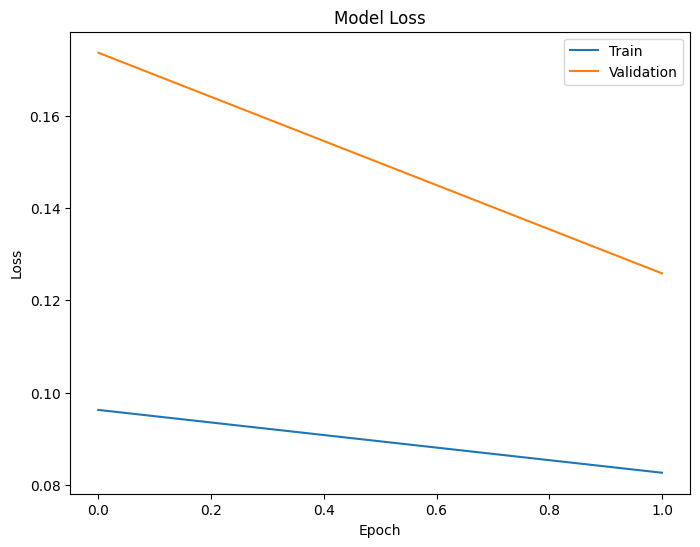

In [59]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

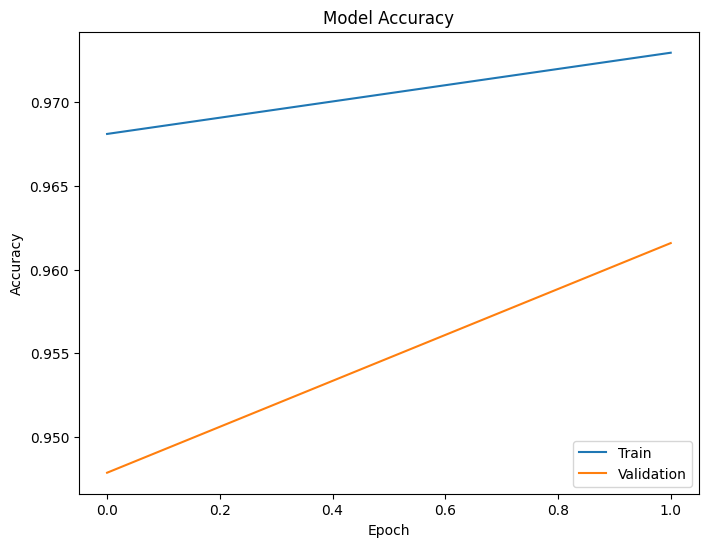

In [63]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [21]:
train_loss,train_acc = model.evaluate(trainingset)

2197/2197 [==============================] - 1099s 500ms/step - loss: 0.0734 - accuracy: 0.9747


In [22]:
valid_loss,valid_acc = model.evaluate(validationset)

550/550 [==============================] - 314s 565ms/step - loss: 0.1586 - accuracy: 0.9488


In [64]:
# model saving
model.save('Trained_model.keras')

In [24]:
training_his.history


NameError: name 'training_his' is not defined

In [26]:
class_name = validationset.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [30]:
Y_pred=model.predict(test_set,batch_size=32)
Y_pred

550/550 [==============================] - 280s 508ms/step


array([[9.9995261e-01, 3.0003066e-05, 5.2274004e-07, ..., 3.4054725e-12,
        7.8793673e-11, 1.2452035e-09],
       [9.9997348e-01, 2.5592495e-05, 3.6425429e-09, ..., 6.6699402e-13,
        2.3124688e-12, 1.9585221e-11],
       [9.9999851e-01, 4.6631700e-07, 8.1689635e-08, ..., 9.3563143e-16,
        2.0226378e-13, 3.2860161e-09],
       ...,
       [9.9694197e-10, 7.8376182e-14, 1.3963508e-10, ..., 2.1481998e-12,
        8.9733066e-13, 9.9993253e-01],
       [4.9505280e-07, 4.2362641e-11, 1.9142166e-09, ..., 6.5855565e-10,
        1.4666222e-10, 9.9999619e-01],
       [7.3413387e-15, 1.1587840e-16, 7.0954925e-15, ..., 1.6035255e-15,
        8.9639979e-12, 9.9999857e-01]], dtype=float32)

In [32]:
Y_pred.shape

(17572, 38)

In [33]:
predicted_categories= tf.argmax(Y_pred,axis=1)

In [34]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
#precisio recall
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
classification_report(y_true,predicted_categories,target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.99      0.91      0.95       504\n                                 Apple___Black_rot       0.97      0.98      0.97       497\n                          Apple___Cedar_apple_rust       0.91      0.99      0.95       440\n                                   Apple___healthy       0.96      0.95      0.95       502\n                               Blueberry___healthy       0.96      0.93      0.94       454\n          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.97       421\n                 Cherry_(including_sour)___healthy       0.98      0.93      0.96       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.80      0.98      0.88       410\n                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.98      

In [46]:
# f1 score is the harmonic mean of the precision and recall
cm= confusion_matrix(y_true,predicted_categories)
cm

array([[459,   7,   5, ...,   0,   0,   0],
       [  0, 485,   1, ...,   0,   0,   0],
       [  0,   0, 436, ...,   1,   0,   0],
       ...,
       [  0,   0,   1, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 429,   0],
       [  0,   0,   2, ...,   0,   0, 470]], dtype=int64)

In [47]:
cm.shape

(38, 38)

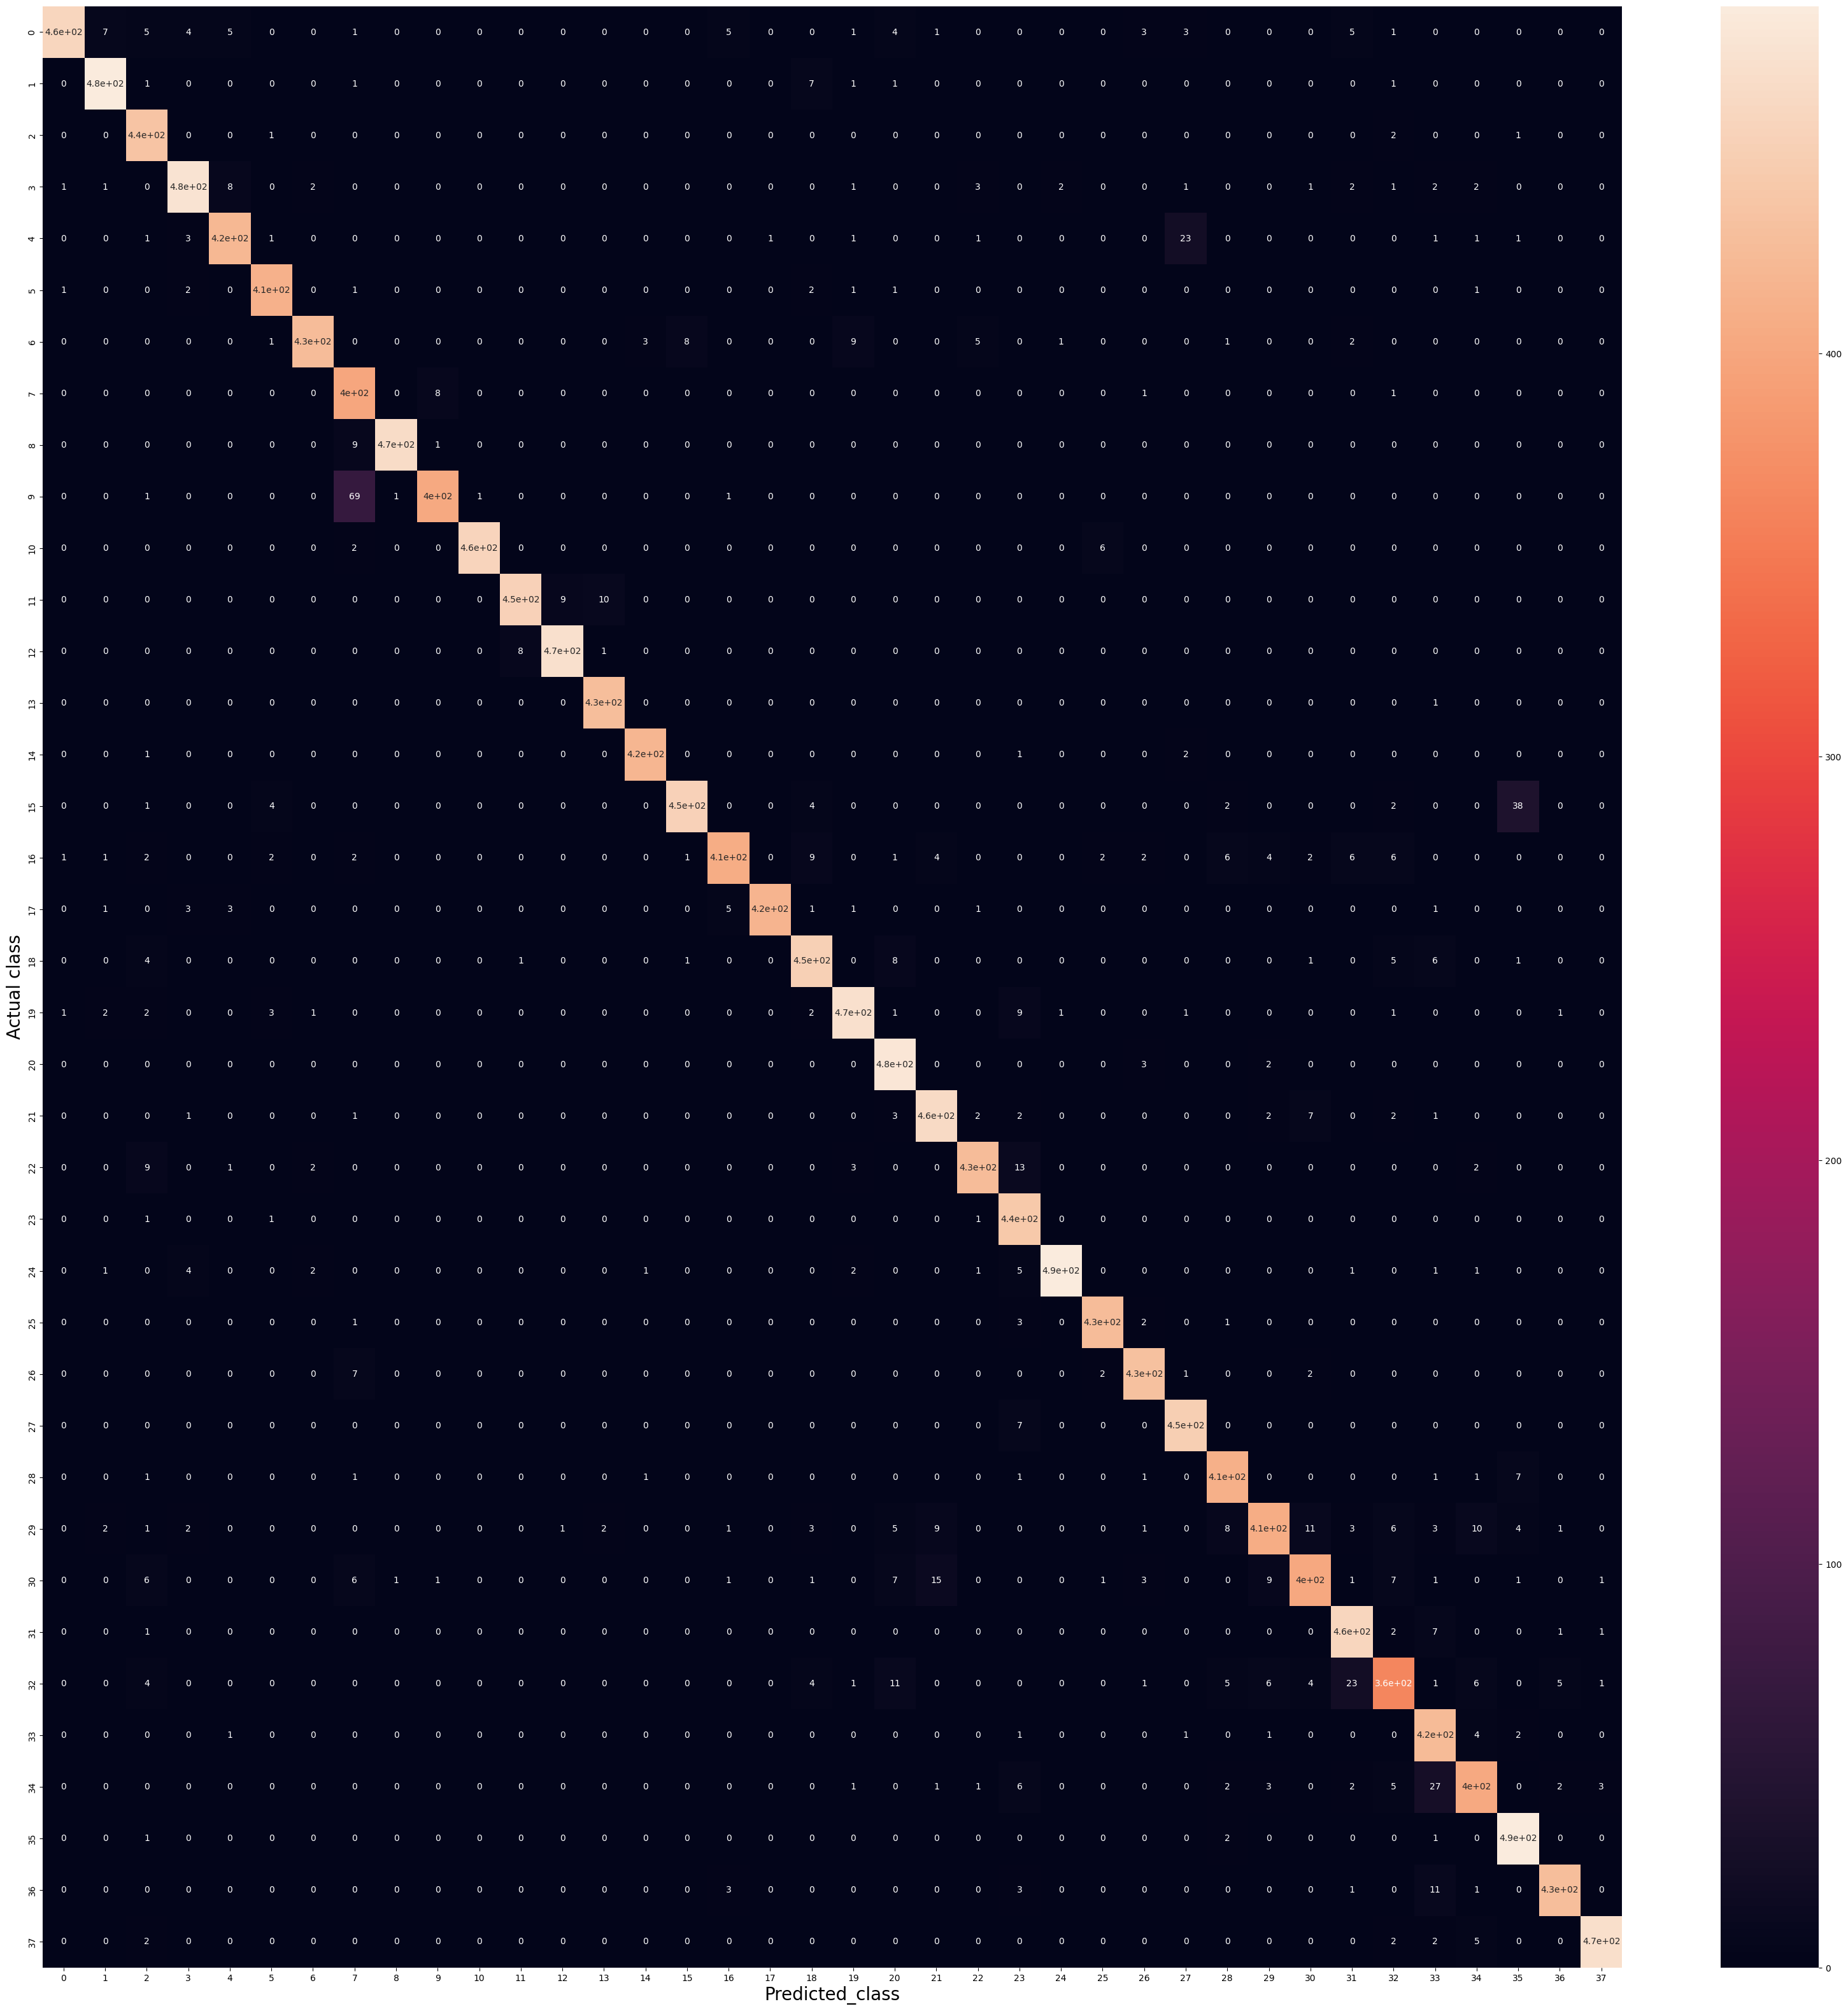

In [55]:
# visualization of the confusion matrix
# using the seaborn library
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted_class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25) 
plt.show()